# Modulación
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Aprovechamiento del medio de transmisión
La modulación engloba un conjunto de técnicas que se usan para transportar información sobre una onda portadora en distintos valores de frecuencia, optimizando el ancho de banda disponible en el medio de transmisión.

### Agenda
1. Modulación análoga con portadora análoga
1. Modulación análoga con portadora digital
1. Modulación digital con portadora análoga

In [20]:
# Importar módulos al cuaderno
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from math import pi
from numpy import sin

## 3. Ejecutando código
---
Antes de iniciar la ejecución del código debe escoger el núcleo o <code>Kernel</code> para la ejecución de dicho código; en este curso usaremos el lenguaje Python en su versión 3.8, pero también son posibles otros lenguajes de programación y versiones de Python como ya se mencionó anteriormente.

Puede elegir ejecutar celdas de diferentes maneras:
* Una celda individual
* Todas las celdas hacia abajo.
* Todas las celdas hacia arriba.
* Todas las celdas de código en un <code>Jupyter Notebook</code>.

>**NOTA:** siempre tenga en cuenta que si una celda no ha sido ejecutada sus resultados no estarán disponibles y entonces la ejecución de una celda que necesite esos datos puede fallar o dar resultados incorrectos.

----------------------------------------------
 Frecuencia de la portadora:         740.0 Khz
 Longitud de onda de la portadora:   405.1 mts
----------------------------------------------


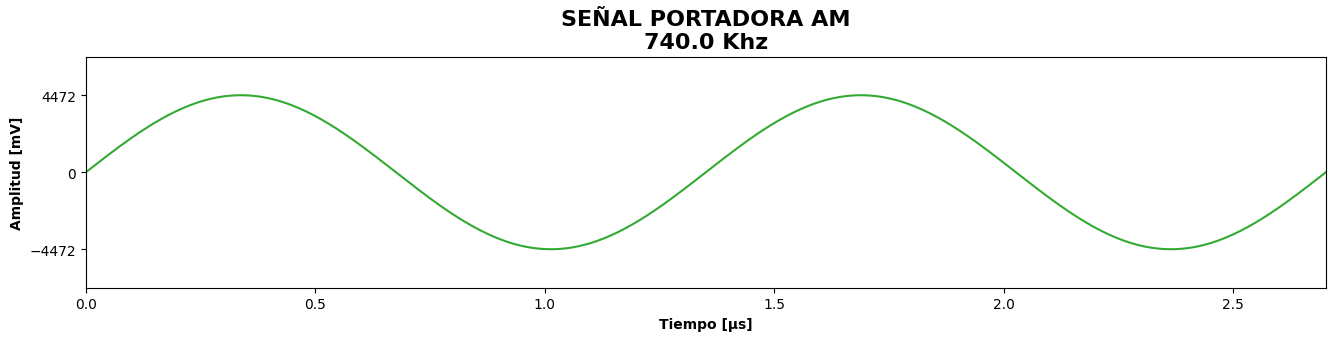

In [21]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
c = 299_792_458         # Velocidad de la luz (propagación ondas electromagnéticas)
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora 
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} Khz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16,3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV 
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() + 
         f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


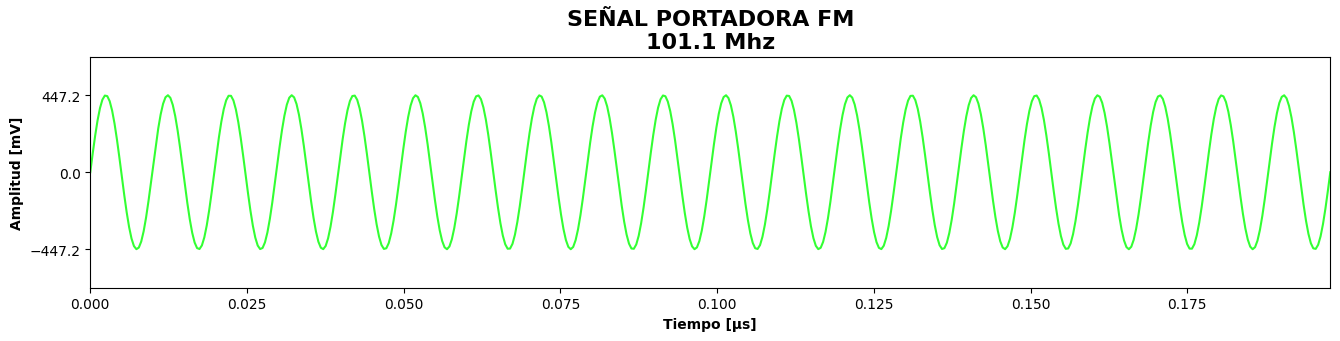

In [22]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16,3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV 
plt.plot(t, Sp, color="#33FF33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora FM\n".upper() + 
         f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

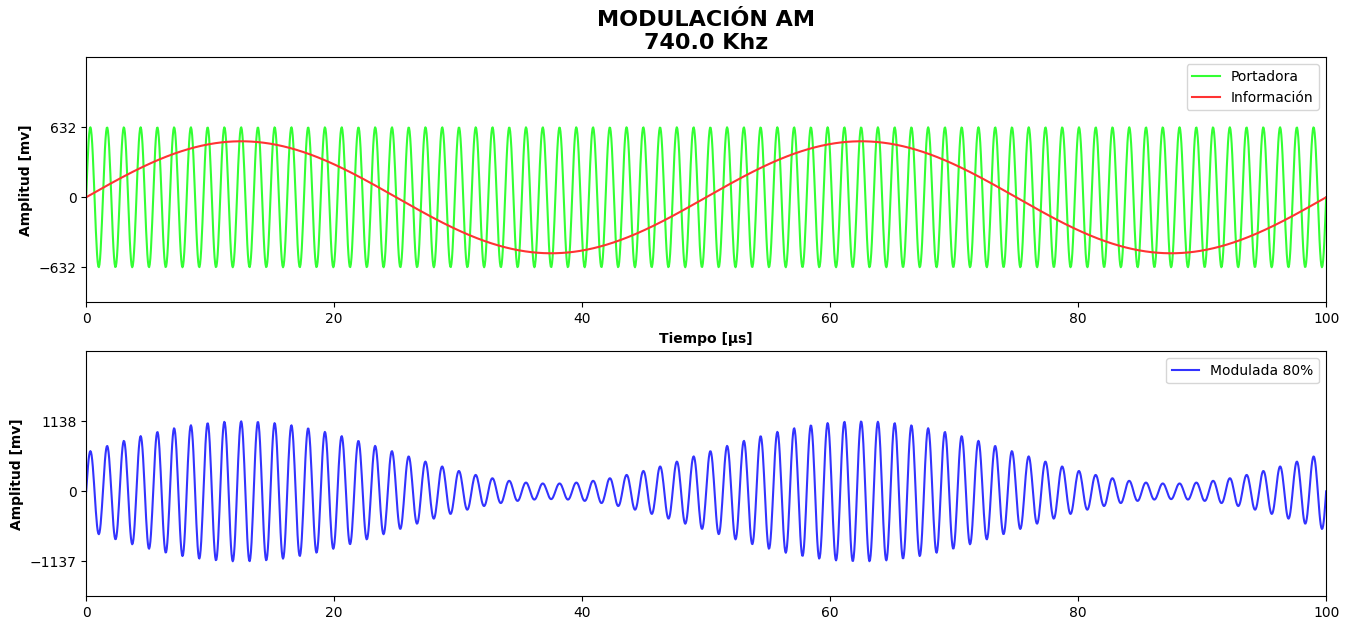

In [23]:
# Modulación AM
# ---------------------------------------------
# 106 bandas AM posibles de 10Khz entre 540Khz – 1600Khz
WB = 10_000             # Ancho de banda AM
fp = 740_000            # Frecuencia de la portadora (Ecos de pasto)
h = 80                  # Porcentaje de modulación (índice)

# Parámetros señal 1 - señal de la portadora 
# --------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
# Potencia de un transmisor de 20 W y antena de (50 Ω - 10Km)
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
Potencia = 20
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)

# Parámetros señal 2 - señal de información de audio
# ---------------------------------------
fi = 20_000             # Frecuencia de una señal de audio
Wi = 2 * pi * fi        # Frecuencia angular de la moduladora
Ai = Ap * (h/100)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                  # Numero de longitudes de onda visibles
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal portadora de AM
Sp = Ap * sin(Wp*t)
# Señal información
θ = 0
Si = Ai * sin(Wi*t + θ)
# Señal modulada en AM
Sm = (Si/Ap + 1) * Sp
Sm = Ai * sin(Wi*t + θ) * sin(Wp*t) + Ap * sin(Wp*t)

# Transformando loa valores a escalas apreciables
# ----------------------------------------------------
t *= 1_000_000      # Transformando escala de t a μs
Sp *= 1_000         # Transformando escala de Sp a mV 
Si *= 1_000         # Transformando escala de Si a mV
Sm *= 1_000         # Transformando escala de Sm a mV 

# Gráficas
# Eje 1 - Señal portadora de AM y señal de información
# ----------------------------------------------------
plt.figure(figsize=(16, 7))
plt.subplot(211)
plt.plot(t, Sp, label="Portadora", color="#33FF33")
plt.plot(t, Si, label="Información", color="#FF3333")

plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*2)
plt.yticks([Sp.min(), 0, Sp.max()])
# Textos
plt.title(
    "Modulación AM\n".upper()+f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

# Eje 2 - Señal modulada en AM
# ----------------------------
plt.subplot(212)
plt.plot(t, Sm, label=f"Modulada {h}%", color="#3333FF")

plt.xlim(t.min(), t.max())
plt.ylim(Sm.min()*1.5, Sm.max()*2)
plt.yticks([Sm.min(), 0, Sm.max()])

plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

plt.show()

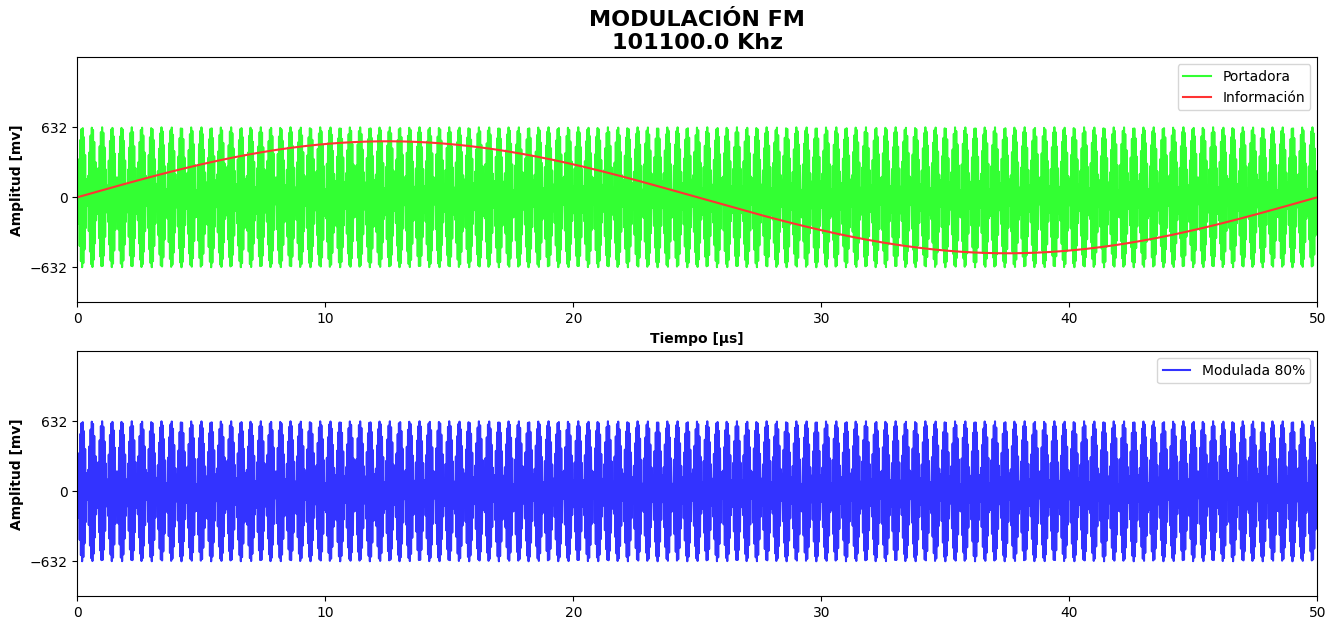

In [24]:
# Modulación FM - Banda base
# ---------------------------------------------
# 100 bandas FM posibles de 200Khz entre 88.1Mhz – 108.1Mhz
WB = 100_000
fp = 101_100_000     # Frecuencia de la portadora
h = 80               # Indice de modulación

# Parámetros señal 1 - señal de la portadora 
# --------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
# Potencia de un transmisor de 20 W y antena de (50 Ω - 10Km)
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
Potencia = 20
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)

# Parámetros señal 2 - señal de información de audio
# ---------------------------------------
fi = 20_000             # Frecuencia de una señal de audio
Wi = 2 * pi * fi        # Frecuencia angular de la moduladora
Ai = Ap * (h/100)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 1                  # Numero de longitudes de onda visibles
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal portadora de FM
Sp = Ap * sin(Wp*t)
# Señal información
θ = 0
Si = Ai * sin(Wi*t + θ)
# Señal modulada en FM
Sm = Ap * sin((Wp+Si) * t)

# Transformando loa valores a escalas apreciables
# ----------------------------------------------------
t *= 1_000_000      # Transformando escala de t a μs
Sp *= 1_000         # Transformando escala de Sp a mV 
Si *= 1_000         # Transformando escala de Si a mV
Sm *= 1_000         # Transformando escala de Sm a mV 

# Gráficas
# Eje 1 - Señal portadora de FM y señal de información
# ----------------------------------------------------
plt.figure(figsize=(16, 7))
plt.subplot(211)
plt.plot(t, Sp, label="Portadora", color="#33FF33")
plt.plot(t, Si, label="Información", color="#FF3333")

plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*2)
plt.yticks([Sp.min(), 0, Sp.max()])
# Textos
plt.title(
    "Modulación FM\n".upper()+f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

# Eje 2 - Señal modulada en FM
# ----------------------------
plt.subplot(212)
plt.plot(t, Sm, label=f"Modulada {h}%", color="#3333FF")

plt.xlim(t.min(), t.max())
plt.ylim(Sm.min()*1.5, Sm.max()*2)
plt.yticks([Sm.min(), 0, Sm.max()])

plt.ylabel("Amplitud [mv]", fontweight="bold")
plt.legend()

plt.show()

In [25]:
Kp = 6.79e-34           # Constante de Plank [J.s]
Vc = 299_792_458        # Velocidad de la luz [m.s]
λp = Vc / fp            # Longitud de onda de la portadora [m]
Ep = Kp * fp            # Energía [J]
Pp = 3600 * Ep

# Diccionario de frecuencias de la luz en Thz
frecuencias = {"Infrarrojo":337, "Rojo":470, "Amarillo":496, "Verde":581, "Azul": 641, "Violeta":744}

# Salida estándar - Formateo de cadenas
print(f"------------------------------------------------------------------------")
print(f"|   Frecuencia de la portadora:        | {fp:20.2e} Hz       |")
print(f"|   Longitud de onda de la portadora:  | {λp:20.2e} Mts      |")
print(f"|   Energía de la portadora:           | {Ep:20.2e} Julios   |")
print(f"|   Potencia de la portadora (1h):     | {Pp:20.2e} Vatios   |")
print(f"------------------------------------------------------------------------")
print(f"|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |")
print(f"------------------------------------------------------------------------")
for key in frecuencias:
    color = key
    f = frecuencias[key] * 1e12
    λ = Vc / f
    e = Kp * f
    p = 3600 * e
    print(f"|       {color:>10} | {f:10.2e} |  {λ:11.2e}  |  {e:7.2e} | {p:7.2e} |")

print(f"------------------------------------------------------------------------")

------------------------------------------------------------------------
|   Frecuencia de la portadora:        |             1.01e+08 Hz       |
|   Longitud de onda de la portadora:  |             2.97e+00 Mts      |
|   Energía de la portadora:           |             6.86e-26 Julios   |
|   Potencia de la portadora (1h):     |             2.47e-22 Vatios   |
------------------------------------------------------------------------
|  Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGÍA  | POTENCIA |
------------------------------------------------------------------------
|       Infrarrojo |   3.37e+14 |     8.90e-07  |  2.29e-19 | 8.24e-16 |
|             Rojo |   4.70e+14 |     6.38e-07  |  3.19e-19 | 1.15e-15 |
|         Amarillo |   4.96e+14 |     6.04e-07  |  3.37e-19 | 1.21e-15 |
|            Verde |   5.81e+14 |     5.16e-07  |  3.94e-19 | 1.42e-15 |
|             Azul |   6.41e+14 |     4.68e-07  |  4.35e-19 | 1.57e-15 |
|          Violeta |   7.44e+14 |     4.03e-07  |  

---
## Mas Recursos

- [Documentación oficial de Jupyter](https://jupyter.org/documentation)
- [Documentación de Jupyter VSCode](https://code.visualstudio.com/docs/python/jupyter-support)
- [Radio AM](https://es.wikipedia.org/wiki/Radio_AM) (Wikipedia)
- [Detector de envolvente](https://es.wikipedia.org/wiki/Detector_de_envolvente) (Wikipedia)
- [Detector de envolvente](https://oshwlab.com/giancarlobenavides/am_rx) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) 
(PDF)
